<a href="https://colab.research.google.com/github/kv8936/Predictive_sales_modeling/blob/main/Assignment_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/breast_cancer_dataset.csv")


# Display structure
print(df.shape)
print(df.dtypes)
df.head()


(569, 32)
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# Unique values
print("Unique values in 'diagnosis':", df['diagnosis'].unique())

# Value counts
print("\nValue counts:")
print(df['diagnosis'].value_counts())

# Relative percentages
print("\nPercentage distribution:")
print(df['diagnosis'].value_counts(normalize=True) * 100)

# Basic EDA
print("\nData type:", df['diagnosis'].dtype)
print("Number of missing values:", df['diagnosis'].isnull().sum())


Unique values in 'diagnosis': ['M' 'B']

Value counts:
diagnosis
B    357
M    212
Name: count, dtype: int64

Percentage distribution:
diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64

Data type: object
Number of missing values: 0


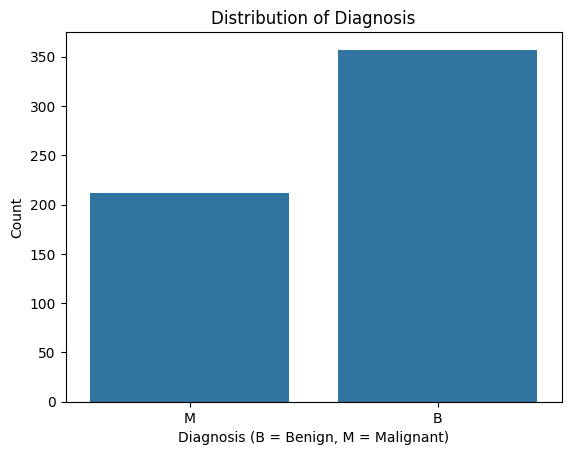

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot target distribution
sns.countplot(data=df, x='diagnosis')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis (B = Benign, M = Malignant)')
plt.ylabel('Count')
plt.show()


In [4]:
# Drop non-numeric columns and get summary statistics
summary_stats = df.drop(['id', 'diagnosis'], axis=1).describe().T[['mean', '50%', 'std']]
summary_stats.rename(columns={'50%': 'median'}, inplace=True)
print(summary_stats)


                               mean      median         std
radius_mean               14.127292   13.370000    3.524049
texture_mean              19.289649   18.840000    4.301036
perimeter_mean            91.969033   86.240000   24.298981
area_mean                654.889104  551.100000  351.914129
smoothness_mean            0.096360    0.095870    0.014064
compactness_mean           0.104341    0.092630    0.052813
concavity_mean             0.088799    0.061540    0.079720
concave points_mean        0.048919    0.033500    0.038803
symmetry_mean              0.181162    0.179200    0.027414
fractal_dimension_mean     0.062798    0.061540    0.007060
radius_se                  0.405172    0.324200    0.277313
texture_se                 1.216853    1.108000    0.551648
perimeter_se               2.866059    2.287000    2.021855
area_se                   40.337079   24.530000   45.491006
smoothness_se              0.007041    0.006380    0.003003
compactness_se             0.025478    0

In [5]:

if 'diagnosis_num' not in df.columns:
    df['diagnosis_num'] = df['diagnosis'].map({'M': 1, 'B': 0})


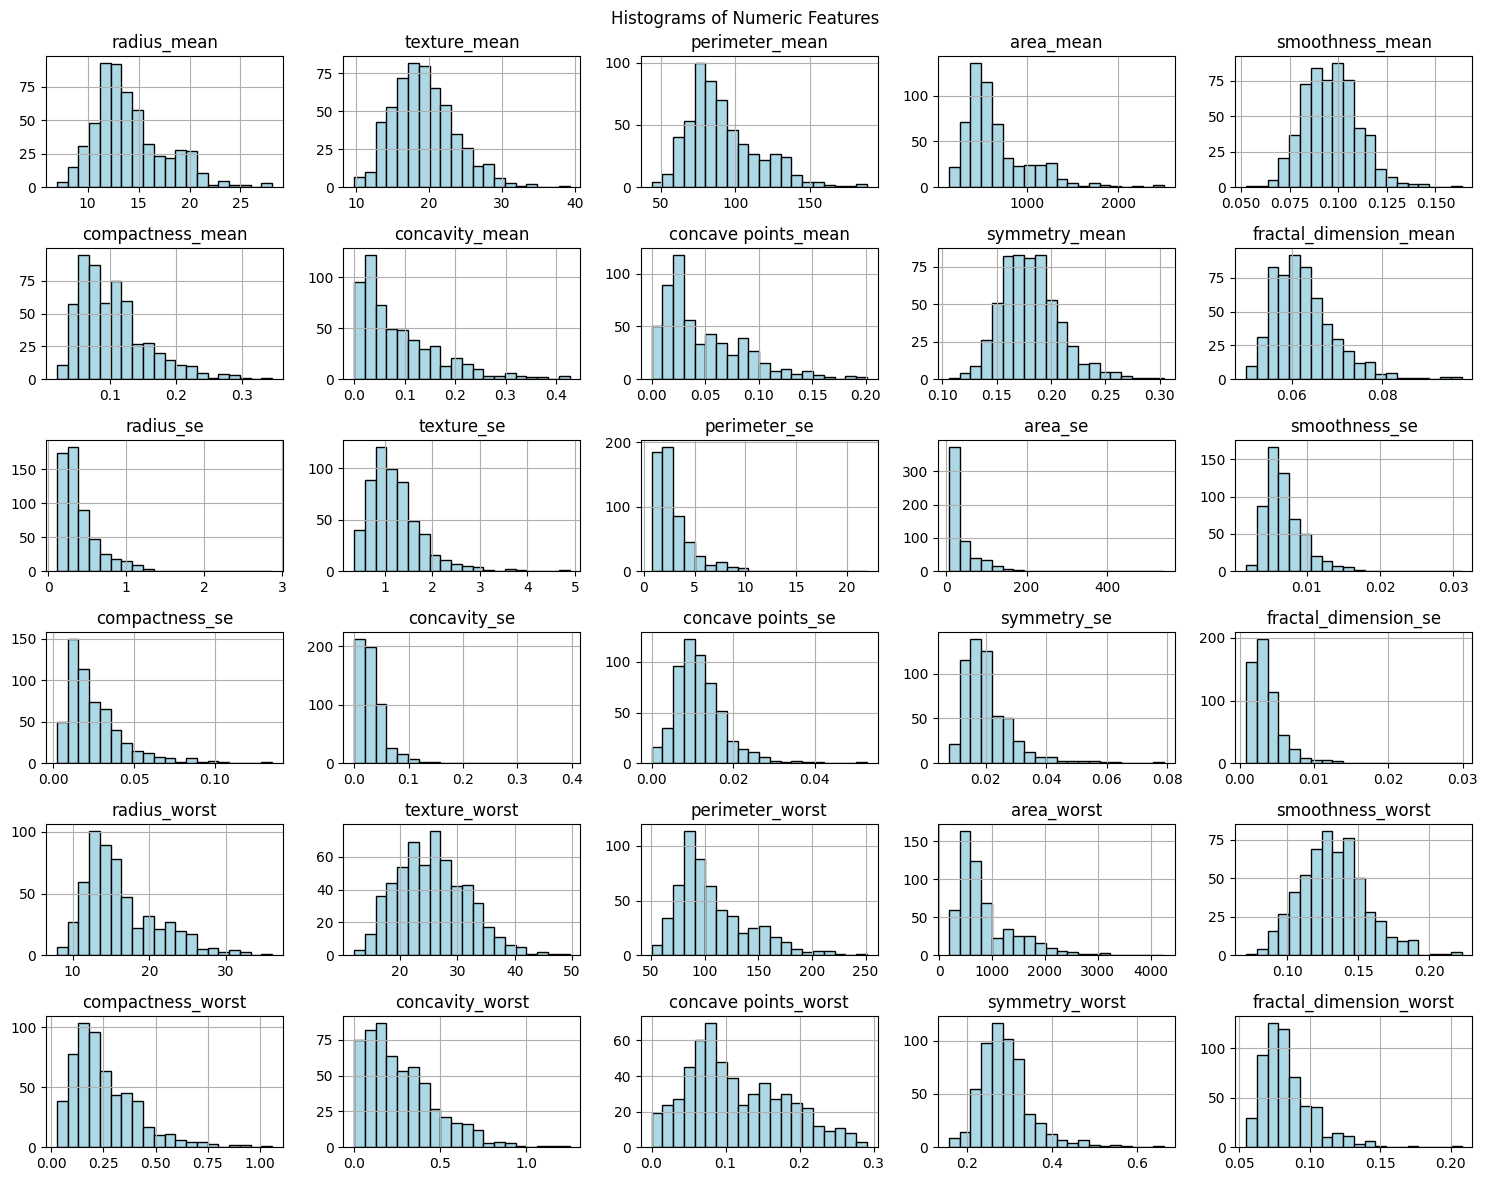

In [6]:
# Plot histograms for all features
df.drop(['id', 'diagnosis', 'diagnosis_num'], axis=1).hist(figsize=(15, 12), bins=20, color='lightblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout()
plt.show()

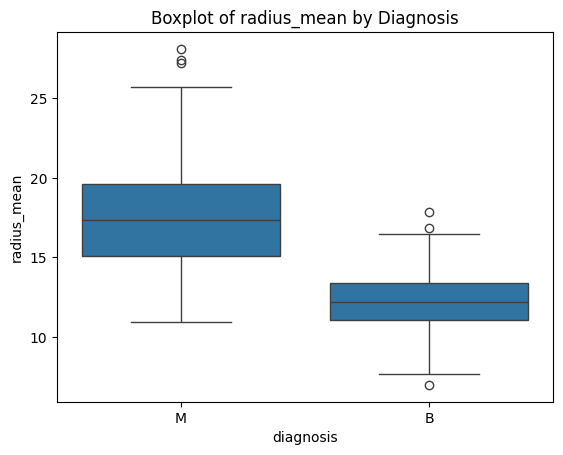

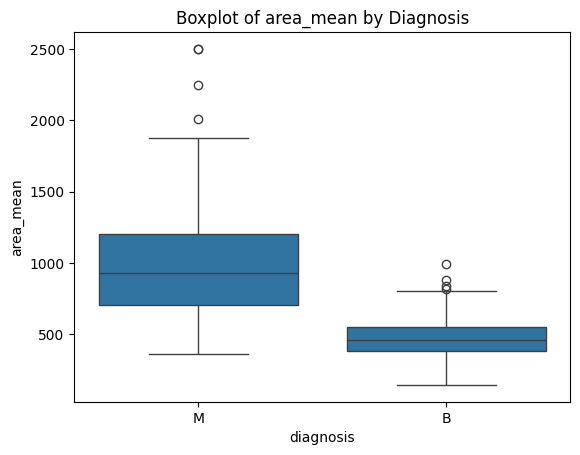

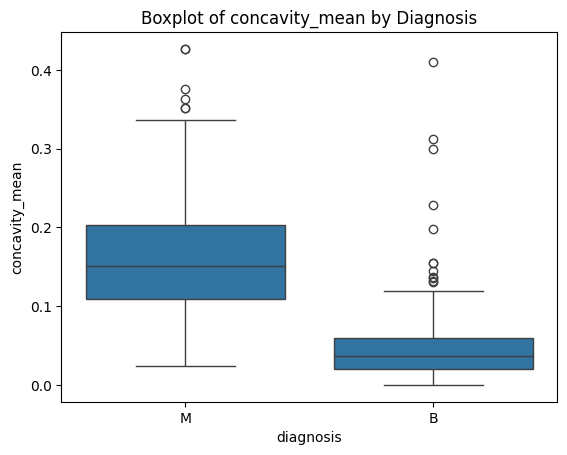

In [7]:
import seaborn as sns

# Boxplots for selected features
for feature in ['radius_mean', 'area_mean', 'concavity_mean']:
    sns.boxplot(data=df, x='diagnosis', y=feature)
    plt.title(f'Boxplot of {feature} by Diagnosis')
    plt.show()


TASK 2
- Assign the diagnosis column as the target variable.
- Identify any missing values.
- Discuss and implement an appropriate imputation strategy (drop, mean, median, etc.) if
needed.
-  Use a scaling approach (StandardScaler, MinMaxScaler) to ensure numerical features share
a similar range.

In [8]:
# Convert diagnosis to binary: Malignant = 1, Benign = 0
df['diagnosis_num'] = df['diagnosis'].map({'M': 1, 'B': 0})
print(df[['diagnosis', 'diagnosis_num']].head())


  diagnosis  diagnosis_num
0         M              1
1         M              1
2         M              1
3         M              1
4         M              1


In [12]:
# Check again for missing values
missing = df.isnull().sum()

# If missing values are found, choose imputation strategy
if missing.any():

    df.fillna(df.median(numeric_only=True), inplace=True)
    print("Missing values were filled using median imputation.")
else:
    print("No missing values found. No imputation needed.")


No missing values found. No imputation needed.


In [9]:
from sklearn.preprocessing import StandardScaler

# Select numeric features only (exclude id, diagnosis, target)
features = df.drop(['id', 'diagnosis', 'diagnosis_num'], axis=1)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(features)

# Optional: check shape
print("Scaled feature matrix shape:", X_scaled.shape)


Scaled feature matrix shape: (569, 30)


Task 3 Model Training:
- Split data into training and testing sets and explain the rationale for the chosen split ratio.
- Choose multiple classification algorithms (e.g., Logistic Regression, Support Vector Machine,
Decision Tree, Random Forest, K-Nearest Neighbors).
- Train each chosen model on the training set.
- Record the default hyperparameters used initially.

In [10]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(['id', 'diagnosis', 'diagnosis_num'], axis=1)
y = df['diagnosis_num']

# Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 398
Testing samples: 171


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize models with default hyperparameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train each model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression trained successfully.
Support Vector Machine trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
K-Nearest Neighbors trained successfully.


In [12]:
# Loop through and fit each model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully on training data.")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression trained successfully on training data.
Support Vector Machine trained successfully on training data.
Decision Tree trained successfully on training data.
Random Forest trained successfully on training data.
K-Nearest Neighbors trained successfully on training data.


In [13]:
# Display default hyperparameters for each model
for name, model in models.items():
    print(f"\n{name} default hyperparameters:")
    print(model.get_params())



Logistic Regression default hyperparameters:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Support Vector Machine default hyperparameters:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Decision Tree default hyperparameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


Task 4 Model Evaluation and Visualization:

- Evaluate each model on the test set using accuracy, precision, recall, F1-score, and AUC.
- Present results in a clear table or multiple plots (e.g., confusion matrix, ROC curve).
- Discuss which model performed best and why (based on metrics).
o Select the top-performing model(s) for further fine-tuning (e.g., using GridSearchCV or
RandomizedSearchCV).
- Compare pre- vs. post-tuning performance to show improvements.

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dictionary to store evaluation metrics
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)

    # Get probabilities if available (needed for AUC)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)

    # Store all metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob)
    }

# Print all results nicely
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")



Logistic Regression:
Accuracy: 0.9649
Precision: 0.9672
Recall: 0.9365
F1 Score: 0.9516
AUC: 0.9979

Support Vector Machine:
Accuracy: 0.9357
Precision: 1.0000
Recall: 0.8254
F1 Score: 0.9043
AUC: 0.9931

Decision Tree:
Accuracy: 0.9357
Precision: 0.8824
Recall: 0.9524
F1 Score: 0.9160
AUC: 0.9392

Random Forest:
Accuracy: 0.9708
Precision: 0.9833
Recall: 0.9365
F1 Score: 0.9593
AUC: 0.9971

K-Nearest Neighbors:
Accuracy: 0.9591
Precision: 0.9828
Recall: 0.9048
F1 Score: 0.9421
AUC: 0.9953


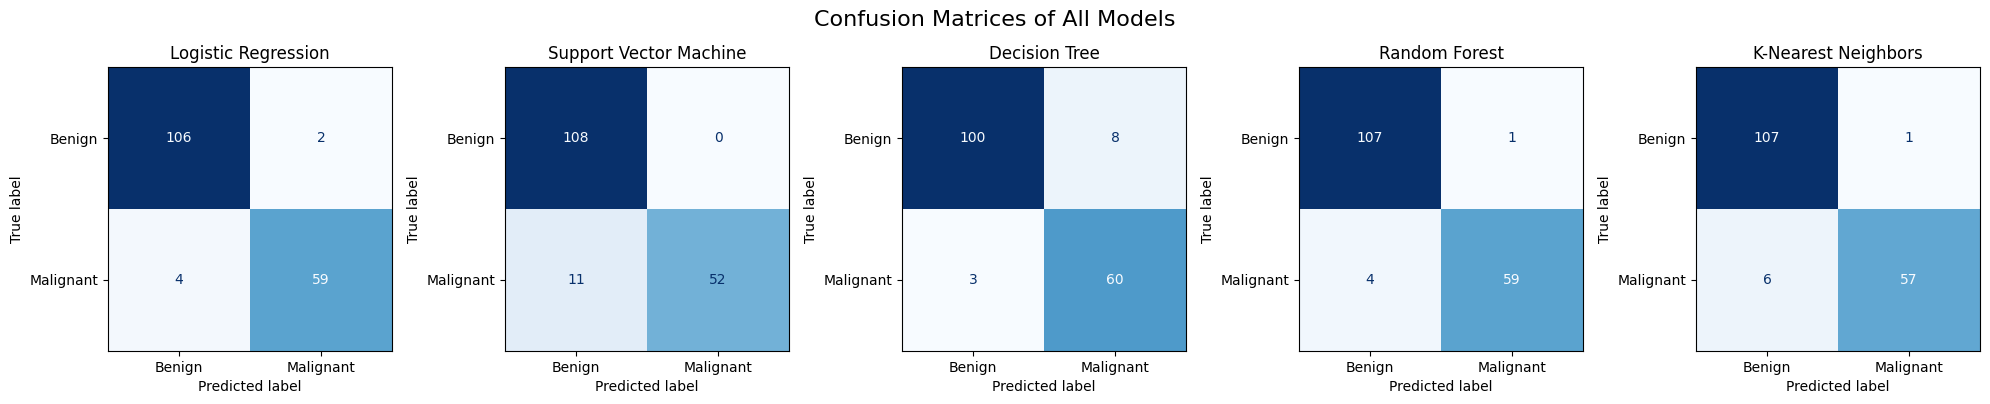

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Set up horizontal layout
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Plot confusion matrices
for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(name)
    ax.grid(False)

plt.suptitle("Confusion Matrices of All Models", fontsize=16)
plt.tight_layout()
plt.show()


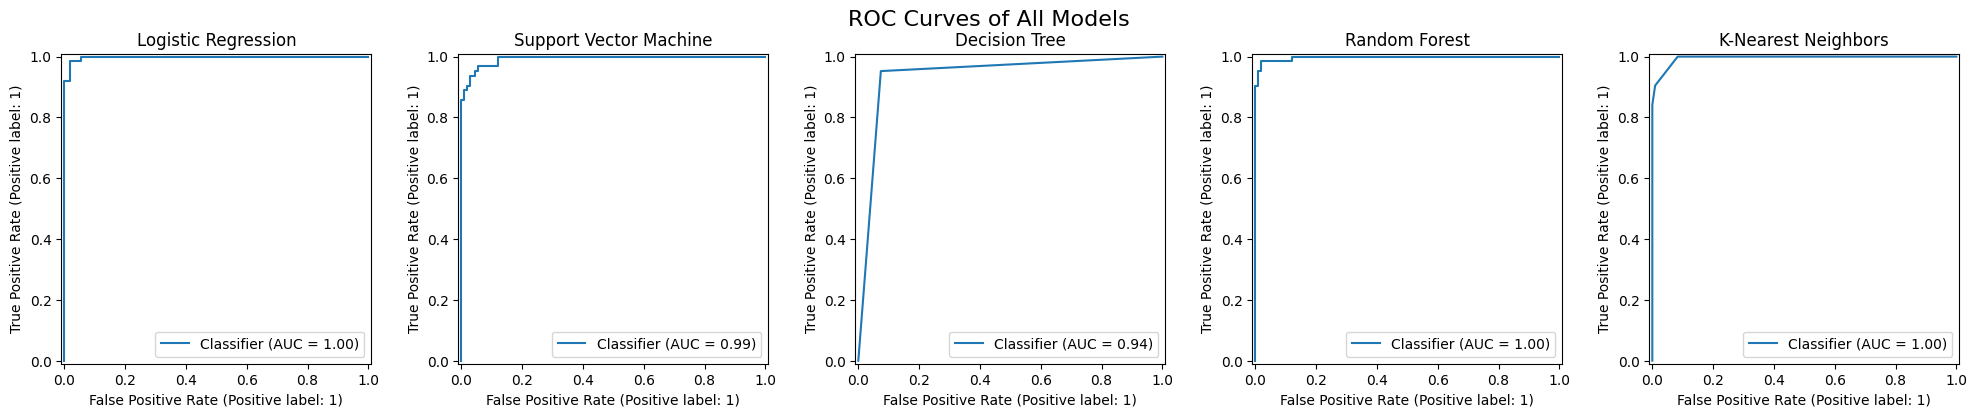

In [16]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Create horizontal layout
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # 1 row, 5 plots

# Plot ROC curves for each model
for ax, (name, model) in zip(axes, models.items()):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)

    RocCurveDisplay.from_predictions(y_test, y_prob, ax=ax)
    ax.set_title(name)

plt.suptitle("ROC Curves of All Models", fontsize=16)
plt.tight_layout()
plt.show()


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# Setup GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [18]:
from sklearn.metrics import f1_score

# Predict with tuned model
y_pred_best = best_rf.predict(X_test)

# Compare F1 Scores
original_f1 = results['Random Forest']['F1 Score']
tuned_f1 = f1_score(y_test, y_pred_best)

print(f"Original F1 Score: {original_f1:.4f}")
print(f"Tuned F1 Score: {tuned_f1:.4f}")


Original F1 Score: 0.9593
Tuned F1 Score: 0.9593


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict with tuned Random Forest
y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:, 1]

# Store post-tuning results
tuned_results = {
    "Accuracy": accuracy_score(y_test, y_pred_best),
    "Precision": precision_score(y_test, y_pred_best),
    "Recall": recall_score(y_test, y_pred_best),
    "F1 Score": f1_score(y_test, y_pred_best),
    "AUC": roc_auc_score(y_test, y_prob_best)
}

# Print comparison
print("🔍 Random Forest - Pre-tuning vs. Post-tuning\n")
for metric in tuned_results:
    pre = results["Random Forest"][metric]
    post = tuned_results[metric]
    print(f"{metric:10}: Pre = {pre:.4f} | Post = {post:.4f}")


🔍 Random Forest - Pre-tuning vs. Post-tuning

Accuracy  : Pre = 0.9708 | Post = 0.9708
Precision : Pre = 0.9833 | Post = 0.9833
Recall    : Pre = 0.9365 | Post = 0.9365
F1 Score  : Pre = 0.9593 | Post = 0.9593
AUC       : Pre = 0.9971 | Post = 0.9972


<ipython-input-20-37297c7f27d2>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')


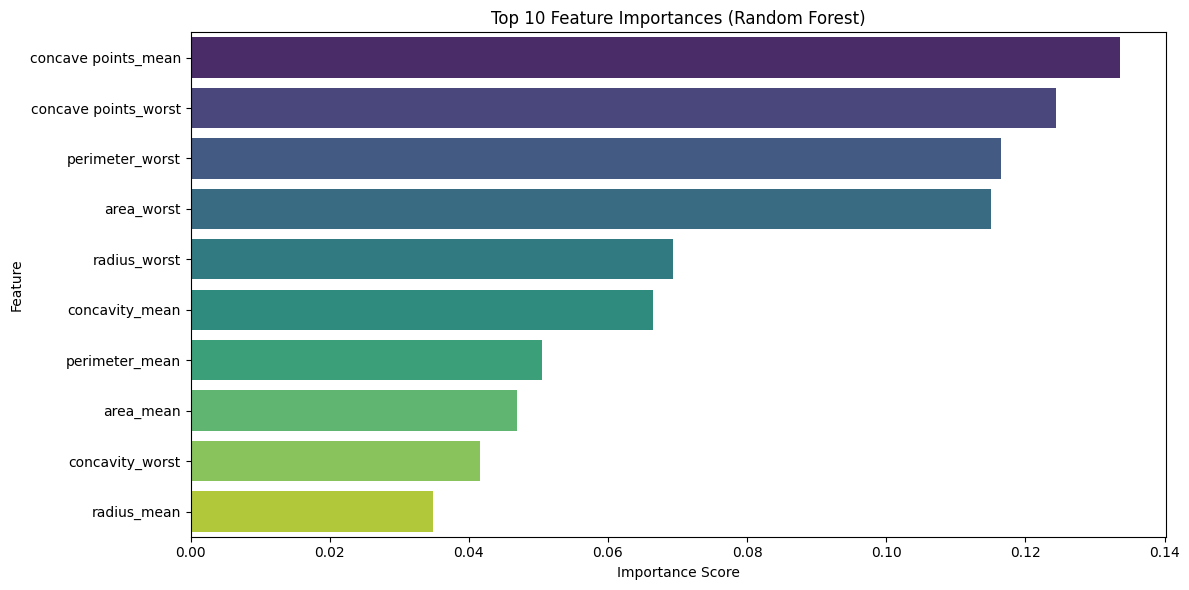

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names
feature_names = df.drop(['id', 'diagnosis', 'diagnosis_num'], axis=1).columns

# Get feature importances from the best (tuned) model
importances = best_rf.feature_importances_

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
